In [0]:
!pip install web3==4.2.1
from web3 import Web3
import matplotlib.pyplot as plt
import numpy as np

In [0]:
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/86430c2c684747dfa77d206779ad2353"))

In [5]:
%%time
n = 8922400
absolute_fee = [] 
relative_fee = [] 
block_number = []
contracts_number =[]
transactions_number = []


for i in range(n, n+100):
    block = web3.eth.getBlock(i, True)
    sum_fee = 0
    contracts = 0
    for tr in block.transactions:
        price = tr.gasPrice
        used = web3.eth.getTransactionReceipt(tr.hash).gasUsed
        sum_fee += price * used
        if tr.input != '0x': #кол-во смарт контрактов
            contracts += 1
    total_fee = sum_fee*(10**(-18))
    contracts_n = contracts 
    number = block.number
    reward = 2 + total_fee + len(block.uncles)/32 #2 - постоянная награда за блок
    
    absolute_fee.append(total_fee)
    relative_fee.append(total_fee * 100 / reward)
    block_number.append(number)
    contracts_number.append(contracts_n)
    transactions_number.append(len(block.transactions))

CPU times: user 25.5 s, sys: 779 ms, total: 26.3 s
Wall time: 15min 10s


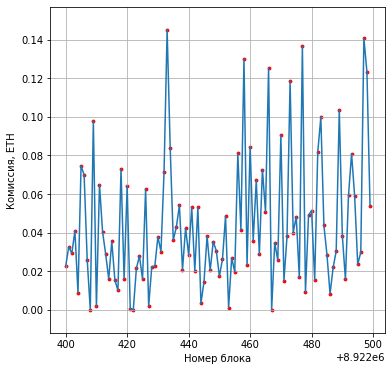

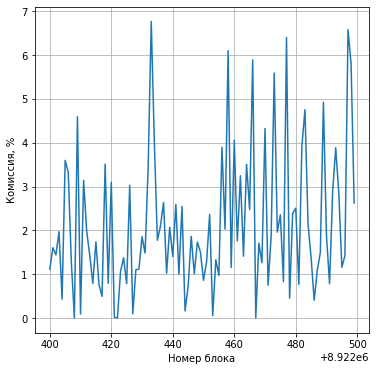

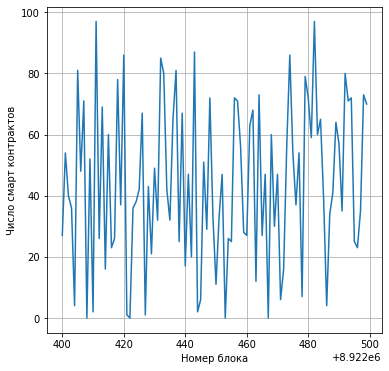

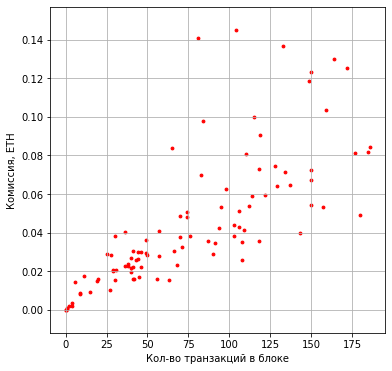

In [6]:
#графики
plt.figure(figsize=(6, 6))
plt.scatter(block_number, absolute_fee, color = 'r', s = 8)
plt.plot(block_number, absolute_fee)
plt.xlabel('Номер блока')
plt.ylabel('Комиссия, ETH')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(block_number, relative_fee)
plt.xlabel('Номер блока')
plt.ylabel('Комиссия, %')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(block_number, contracts_number)
plt.xlabel('Номер блока')
plt.ylabel('Число смарт контрактов')
plt.grid()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(transactions_number, absolute_fee, color = 'r', s = 8)
plt.xlabel('Кол-во транзакций в блоке')
plt.ylabel('Комиссия, ETH')
plt.grid()
plt.show()

In [7]:
print('среднее значение: ', np.mean(absolute_fee))  
print('дисперсия:', np.var(absolute_fee))  
print('СКО: ', np.std(absolute_fee))  
print('медиана: ', np.median(absolute_fee))
print('размах: ', max(absolute_fee) - min(absolute_fee))

среднее значение:  0.04412251195585962
дисперсия: 0.0011712122526186019
СКО:  0.034222978429975986
медиана:  0.035327624802
размах:  0.145137831252462
